In [1]:
from utils import *

### Initialize paths


In [2]:
data_paths = get_file_paths(r'C:/Users/smearlab/clickbait-ephys/preprocessed_data', 'npy', 'ttl', print_paths=True)
# Root directory for saving Kilosort results
save_path = r'C:/Users/smearlab/clickbait-ephys/behavior_data/'

Found 32 ttl.npy files
0 C:\Users\smearlab\clickbait-ephys\preprocessed_data\6000\0\ttls.npy
1 C:\Users\smearlab\clickbait-ephys\preprocessed_data\6000\1\ttls.npy
2 C:\Users\smearlab\clickbait-ephys\preprocessed_data\6000\2\ttls.npy
3 C:\Users\smearlab\clickbait-ephys\preprocessed_data\6000\3\ttls.npy
4 C:\Users\smearlab\clickbait-ephys\preprocessed_data\6000\4\ttls.npy
5 C:\Users\smearlab\clickbait-ephys\preprocessed_data\6000\5\ttls.npy
6 C:\Users\smearlab\clickbait-ephys\preprocessed_data\6000\6\ttls.npy
7 C:\Users\smearlab\clickbait-ephys\preprocessed_data\6000\7\ttls.npy
8 C:\Users\smearlab\clickbait-ephys\preprocessed_data\6001\0\ttls.npy
9 C:\Users\smearlab\clickbait-ephys\preprocessed_data\6001\1\ttls.npy
10 C:\Users\smearlab\clickbait-ephys\preprocessed_data\6001\2\ttls.npy
11 C:\Users\smearlab\clickbait-ephys\preprocessed_data\6001\3\ttls.npy
12 C:\Users\smearlab\clickbait-ephys\preprocessed_data\6001\4\ttls.npy
13 C:\Users\smearlab\clickbait-ephys\preprocessed_data\6001\5\tt

### Convert ttl to boolean

In [3]:
# # List to store ttl booleans
# ttl_bools = []

# for data_path in data_paths[:1]:
#     ttl_bools.append(ttl_bool(data_path, save_path,save=False))

In [4]:
sample_hz=30000
resample_hz=1000

data = np.load(str(data_paths[0]))
ttl_resample = data[::sample_hz//resample_hz]

In [12]:
ttl_bool = clean_camera_ttl(ttl_resample, 
                           threshold=-30000,  # your current threshold
                           min_frame_duration=5,  # reduced from 20
                           min_frame_spacing=5)  # reduced from 100

Number of samples below threshold: 962510
Number of starts found: 96127
Number of ends found: 96127
First few start indices: [23 33 44 48 57]
First few end indices: [24 34 45 49 58]
After matching, number of potential frames: 96127
Frame: start=23, end=24, duration=1, spacing=28
Frame: start=33, end=34, duration=1, spacing=38
Frame: start=44, end=45, duration=1, spacing=49
Frame: start=48, end=49, duration=1, spacing=53
Frame: start=57, end=58, duration=1, spacing=62
Frame: start=117, end=118, duration=1, spacing=122
Frame: start=119, end=120, duration=1, spacing=124
Frame: start=131, end=132, duration=1, spacing=136
Frame: start=162, end=163, duration=1, spacing=167
Frame: start=190, end=191, duration=1, spacing=195
Frame: start=196, end=197, duration=1, spacing=201
Frame: start=200, end=201, duration=1, spacing=205
Frame: start=204, end=205, duration=1, spacing=209
Frame: start=255, end=256, duration=1, spacing=260
Frame: start=264, end=265, duration=1, spacing=269
Frame: start=289, 

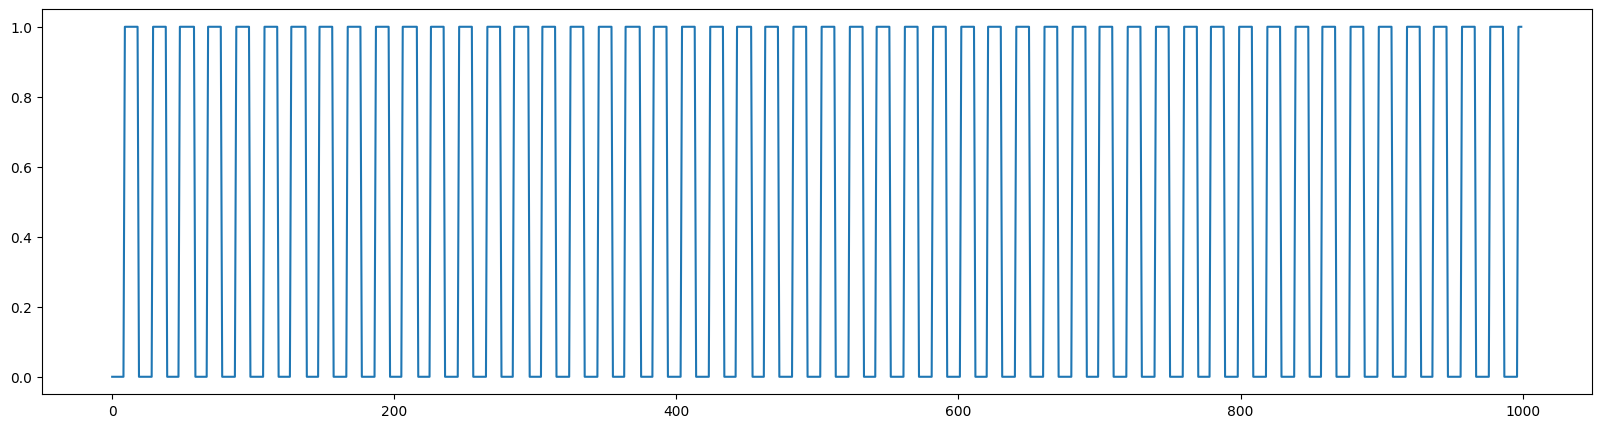

In [16]:
import matplotlib.pyplot as plt

# Preview first second of ttl boolean
# Increase figure size
plt.figure(figsize=(20, 5))
plt.plot(ttl_bool[150000:151000])


In [ ]:
def analyze_ttl_timing(signal, threshold=-25000):
    binary = (signal < threshold).astype(int)
    transitions = np.diff(binary)
    starts = np.where(transitions == 1)[0]
    ends = np.where(transitions == -1)[0]
    
    if len(starts) > 0 and len(ends) > 0:
        # Make sure we have matching pairs
        if ends[0] < starts[0]:
            ends = ends[1:]
        if len(starts) > len(ends):
            starts = starts[:-1]
            
        # Now calculate durations and spacings
        durations = ends - starts  # How long the signal is "on"
        spacings = starts[1:] - ends[:-1]  # Time between pulses
        
        print(f"Average pulse duration: {np.mean(durations):.2f} samples ({np.mean(durations)/1000*1000:.2f} ms)")
        print(f"Average spacing between pulses: {np.mean(spacings):.2f} samples ({np.mean(spacings)/1000*1000:.2f} ms)")
        print(f"Frame rate: {1000/np.mean(starts[1:] - starts[:-1]):.2f} fps")
        
        # Additional diagnostic info
        print(f"\nNumber of pulses analyzed: {len(durations)}")
        print(f"Duration range: {np.min(durations):.2f} to {np.max(durations):.2f} samples")
        print(f"Spacing range: {np.min(spacings):.2f} to {np.max(spacings):.2f} samples")

In [19]:
analyze_ttl_timing(ttl_resample)

ValueError: operands could not be broadcast together with shapes (96127,) (96126,) 